In [99]:
import message_ix
from message_ix import log
import ixmp as ix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from message_plotting import plot_Behnam_script
from diagnostic_functions import plot_gen_share_and_curtailment
#from iso_country_codes import 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

fs = 15
plt.style.use('seaborn-ticks')
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['axes.axisbelow'] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
mp = ix.Platform('local',jvmargs=["-Xmx8G"])

In [122]:
scen_all_included = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500") #,version=1)
scen_zero_curtailment = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_zero_curtail")
scen_slack_firm_capacity = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_100p_capacity_value")
scen_slack_flexibility = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_slack_firm_capacity",version=2) # was named wrongly before it was solved
scen_zero_integration_cost = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_zero_integration_cost")
scen_all_removed = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_zero_vre_integration_constraints")
#scen_wo_IC_C = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_integration_costs_and_curtailment")
scen_wo_IC_C = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_removing_IC_and_curtailment")
scen_wo_IC_wC = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_integration_costs_and_wind_curtailment")
scen_wo_IC_sC = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_integration_costs_and_solar_curtailment")

# Plot scenario where all constraints are included

      wind  solar   sum
2025  24.8   14.2  39.0
2030  28.4   21.3  49.7
2035  27.0   22.8  49.8
2040  32.5   23.1  55.6
2045  38.0   23.6  61.6
2050  39.3   23.3  62.6
2055  38.2   22.3  60.4
2060  35.1   21.0  56.1
2070  29.6   19.5  49.1
2080  25.9   18.1  44.0
2090  24.3   17.8  42.1
2100  26.3   17.8  44.0
2110   NaN    NaN   0.0

Max VRE share:  62.6


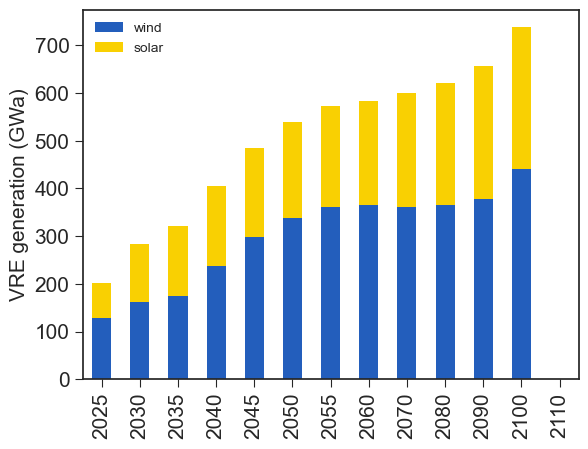

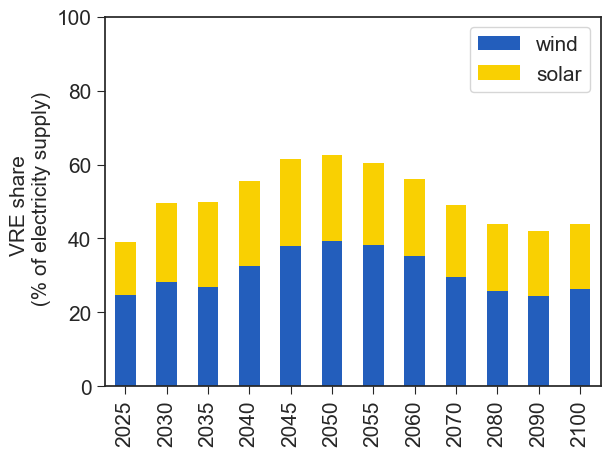

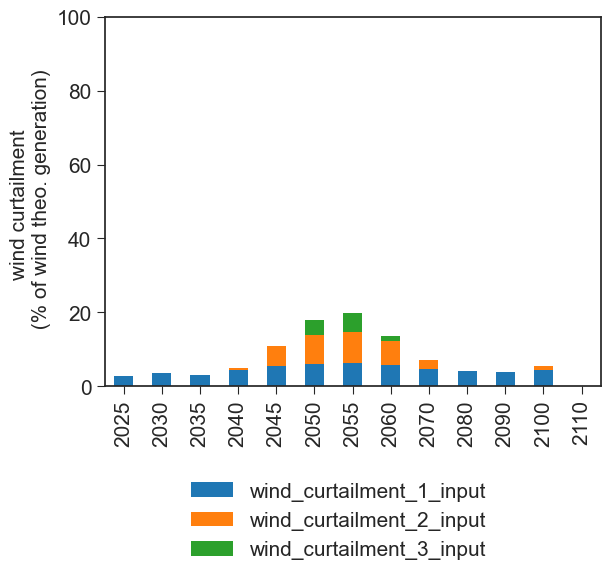

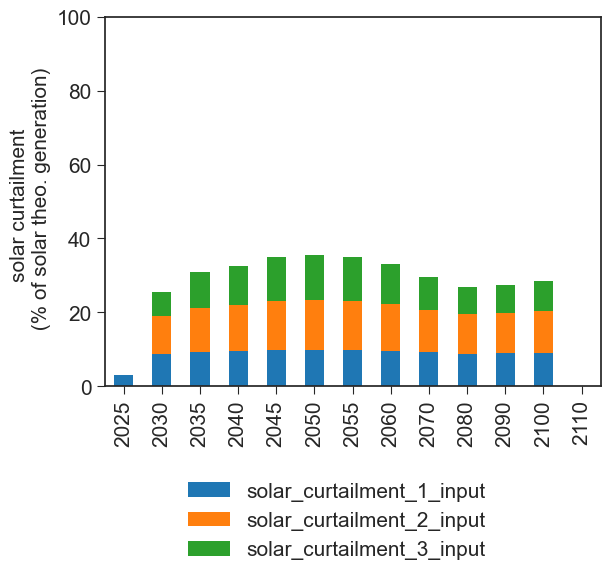

In [103]:
scenarios = {"with_curtailment":scen_all_included,
             }
regions = [
         "Europe",
           ["R11_EEU",
            "R11_WEU",
           ],
         ]
results, df_curtailment, df_generation = plot_Behnam_script(scenarios, region_name=regions, path_result="figures_Behnam_script")

fig2, ax2, df_vre_share_pct, act_renewables = plot_gen_share_and_curtailment(scen_all_included, df_generation, df_curtailment)
df_vre_share_pct["sum"] = df_vre_share_pct.sum(axis=1)

vre_share_reference = df_vre_share_pct["sum"]

print(df_vre_share_pct.round(1))
print("")
print("Max VRE share: ",df_vre_share_pct.round(1)["sum"].max())

ax2.legend(prop={'size': fs},frameon=True)
ax2.set_xlim(-0.5,11.5)
fig2.savefig("figures/vre_share_reference.png",dpi=600,bbox_inches='tight')

# Read scenario where the curtailment constraint is removed

          wind  solar   sum
year_act                   
2025      25.3   14.5  39.8
2030      25.0   29.3  54.4
2035      22.4   34.2  56.6
2040      22.8   36.9  59.6
2045      22.8   39.6  62.4
2050      23.0   37.1  60.1
2055      23.3   34.9  58.2
2060      23.4   30.9  54.4
2070      23.1   24.7  47.9
2080      22.6   23.1  45.8
2090      22.8   23.1  45.9
2100      23.7   29.6  53.3
2110       NaN    NaN   0.0

Max VRE share:  62.4


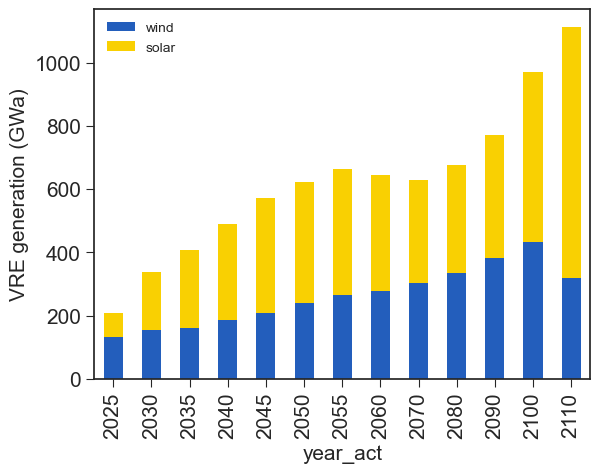

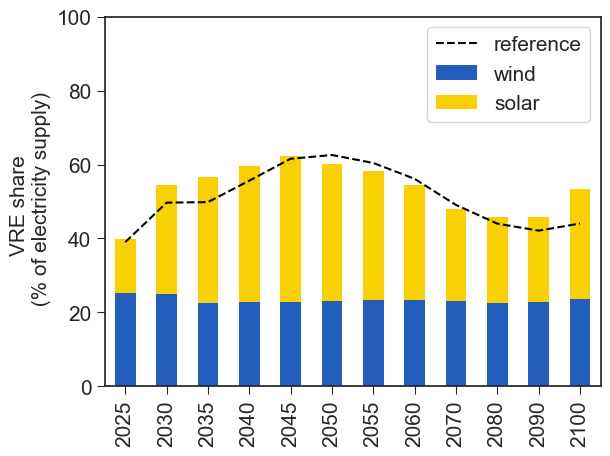

In [88]:
scenarios = {
             "without_curtailment":scen_zero_curtailment,
             }
regions = [
         "Europe",
           ["R11_EEU",
            "R11_WEU",
           ],
         ]
results, df_curtailment, df_generation = plot_Behnam_script(scenarios, region_name=regions, path_result="figures_Behnam_script",plot_curtailment=False)
fig2, ax2, df_vre_share_pct, act_renewables = plot_gen_share_and_curtailment(scen_zero_curtailment, df_generation, df_curtailment,curtailment=False)
df_vre_share_pct["sum"] = df_vre_share_pct.sum(axis=1)

print(df_vre_share_pct.round(1))
print("")
print("Max VRE share: ",df_vre_share_pct.round(1)["sum"].max())

ax2.plot(np.arange(12),vre_share_reference.values[0:-1], color="black", linestyle="dashed", label="reference")
ax2.legend(prop={'size': fs},frameon=True)
ax2.set_xlim(-0.5,11.5)
ax2.set_xlabel("")
fig2.savefig("figures/vre_share_zero_curtailment.png",dpi=600,bbox_inches='tight')

# Read scenario where the firm capacity constraint is relaxed

      wind  solar   sum
2025  24.6   14.3  38.9
2030  29.9   20.5  50.4
2035  27.6   23.0  50.6
2040  33.2   23.3  56.6
2045  38.3   23.6  61.9
2050  39.1   23.3  62.4
2055  38.0   22.2  60.2
2060  34.4   20.6  55.0
2070  28.9   19.7  48.5
2080  25.2   18.1  43.2
2090  24.7   17.8  42.5
2100  27.4   17.8  45.2
2110   NaN    NaN   0.0

Max VRE share:  62.4


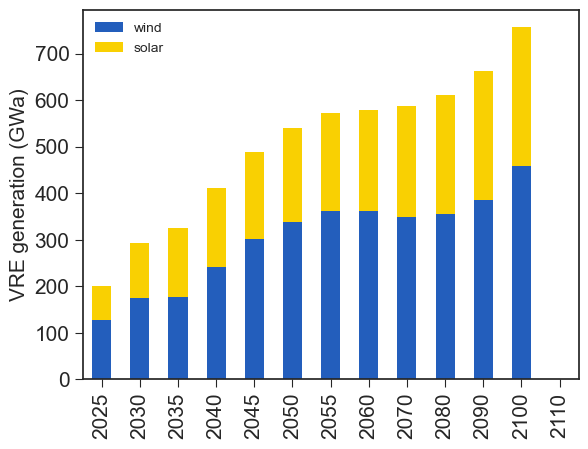

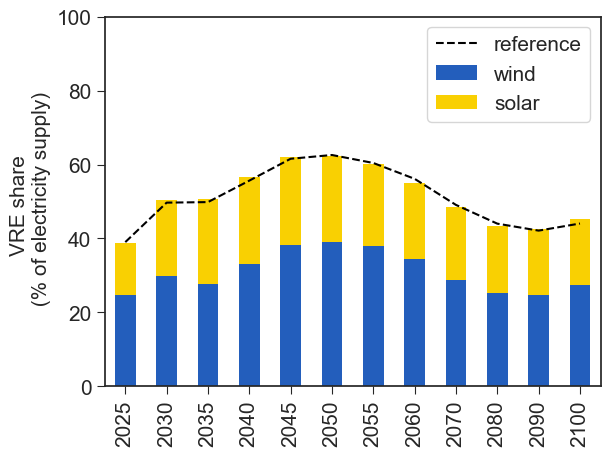

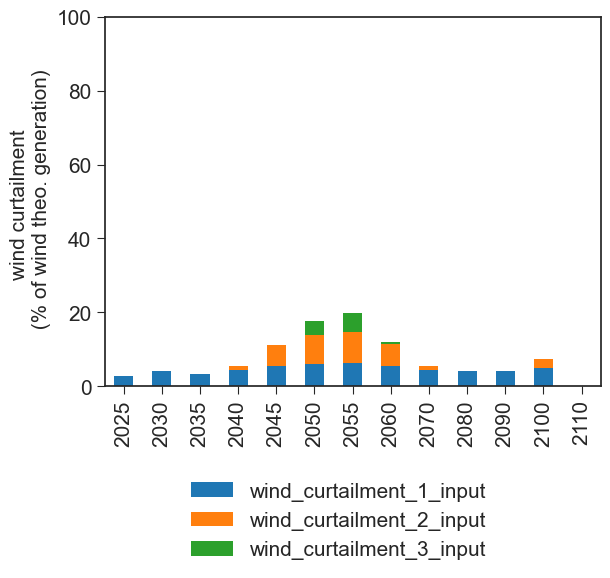

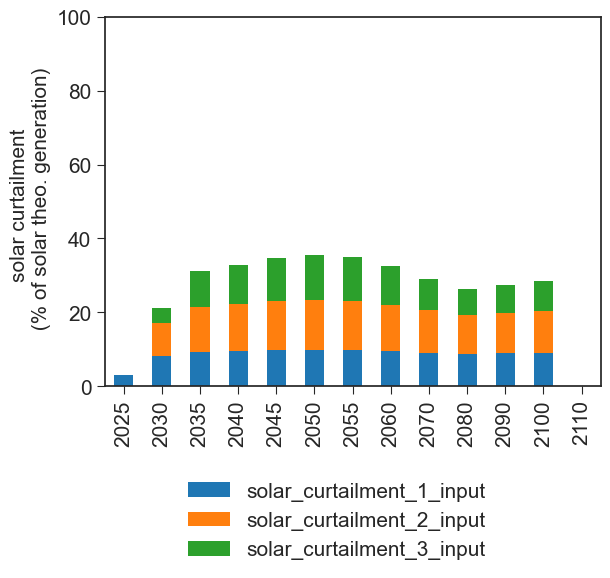

In [89]:
scenarios = {
             "slack_firm_capacity":scen_slack_firm_capacity,
             }
regions = [
         "Europe",
           ["R11_EEU",
            "R11_WEU",
           ],
         ]
results, df_curtailment, df_generation = plot_Behnam_script(scenarios, region_name=regions, path_result="figures_Behnam_script")
fig2, ax2, df_vre_share_pct, act_renewables = plot_gen_share_and_curtailment(scen_slack_firm_capacity, df_generation, df_curtailment)
df_vre_share_pct["sum"] = df_vre_share_pct.sum(axis=1)

print(df_vre_share_pct.round(1))
print("")
print("Max VRE share: ",df_vre_share_pct.round(1)["sum"].max())

ax2.plot(np.arange(12),vre_share_reference.values[0:-1], color="black", linestyle="dashed", label="reference")
ax2.legend(prop={'size': fs},frameon=True)
ax2.set_xlim(-0.5,11.5)
fig2.savefig("figures/vre_share_slack_firm_capacity.png",dpi=600,bbox_inches='tight')

# Read scenario where the flexibility constraint is relaxed

      wind  solar   sum
2025  23.3   14.6  37.9
2030  33.3   18.6  51.9
2035  36.1   19.8  55.8
2040  39.0   21.0  60.0
2045  42.0   22.7  64.7
2050  43.5   23.7  67.2
2055  42.7   23.2  65.9
2060  42.4   23.4  65.8
2070  40.4   22.1  62.5
2080  37.8   20.8  58.6
2090  36.2   20.0  56.2
2100  35.7   19.8  55.5
2110   NaN    NaN   0.0

Max VRE share:  67.2


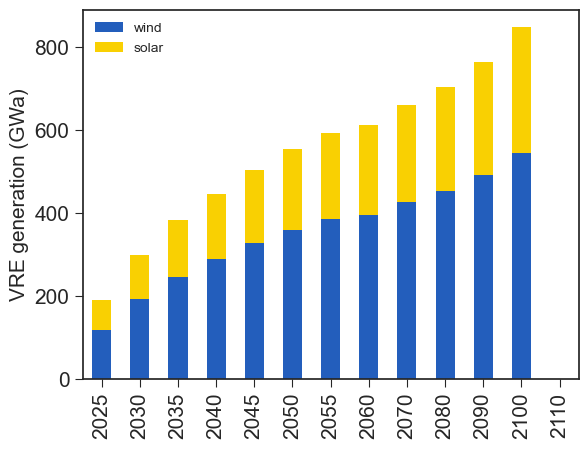

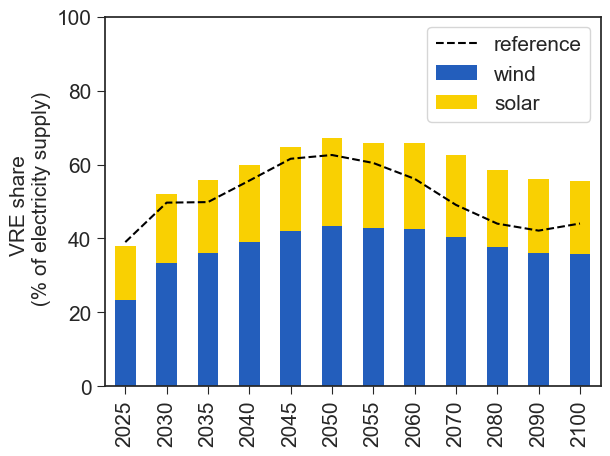

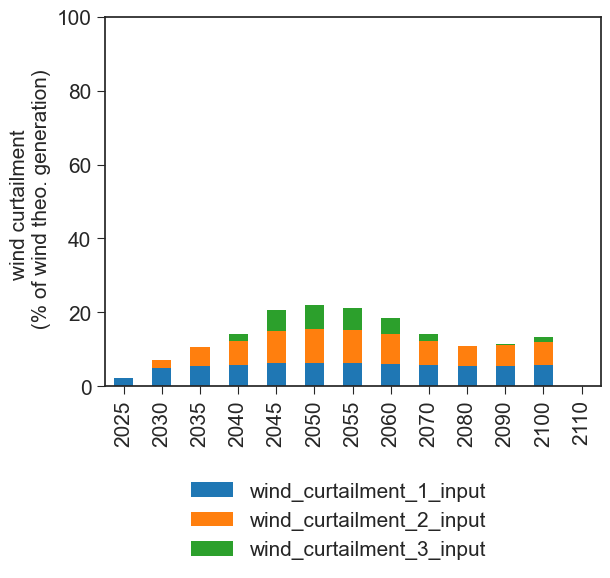

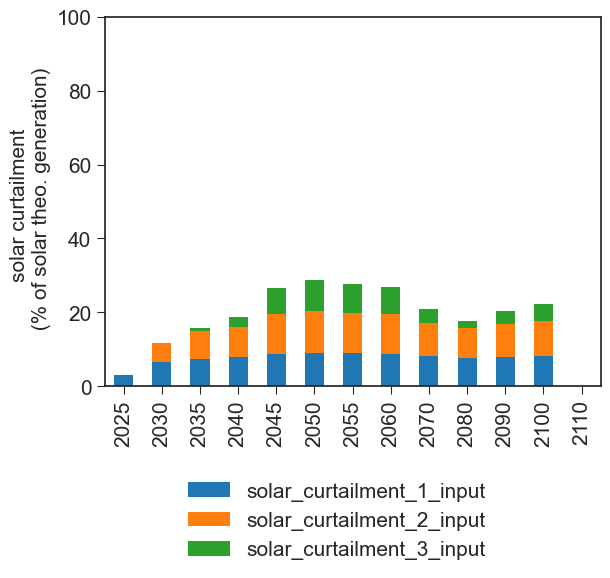

In [90]:
scenarios = {
             "slack_flexibility":scen_slack_flexibility,
             }
regions = [
         "Europe",
           ["R11_EEU",
            "R11_WEU",
           ],
         ]
results, df_curtailment, df_generation = plot_Behnam_script(scenarios, region_name=regions, path_result="figures_Behnam_script")
fig2, ax2, df_vre_share_pct, act_renewables = plot_gen_share_and_curtailment(scen_slack_flexibility, df_generation, df_curtailment)
df_vre_share_pct["sum"] = df_vre_share_pct.sum(axis=1)

print(df_vre_share_pct.round(1))
print("")
print("Max VRE share: ",df_vre_share_pct.round(1)["sum"].max())

ax2.plot(np.arange(12),vre_share_reference.values[0:-1], color="black", linestyle="dashed", label="reference")
ax2.legend(prop={'size': fs},frameon=True)
ax2.set_xlim(-0.5,11.5)

fig2.savefig("figures/vre_share_slack_flexibility.png",dpi=600,bbox_inches='tight')

# Read scenario where the integration cost is removed

      wind  solar   sum
2025  26.5   14.3  40.8
2030  29.7   22.8  52.5
2035  32.8   23.6  56.4
2040  38.5   24.5  63.0
2045  44.8   26.3  71.1
2050  47.8   26.5  74.3
2055  47.8   26.6  74.4
2060  46.7   25.7  72.4
2070  43.9   23.8  67.7
2080  46.1   25.4  71.4
2090  46.4   26.3  72.6
2100  44.6   25.8  70.4
2110   NaN    NaN   0.0

Max VRE share:  74.4


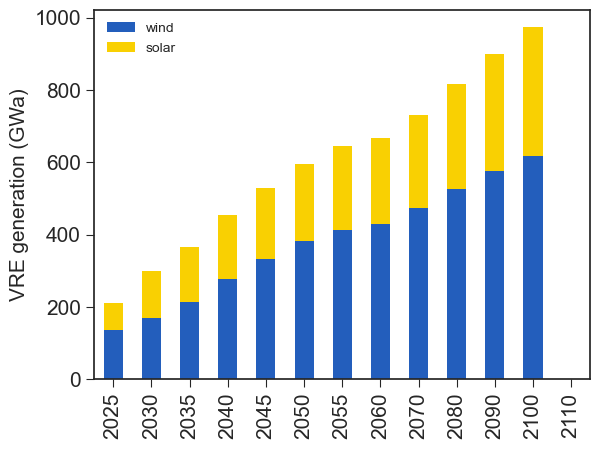

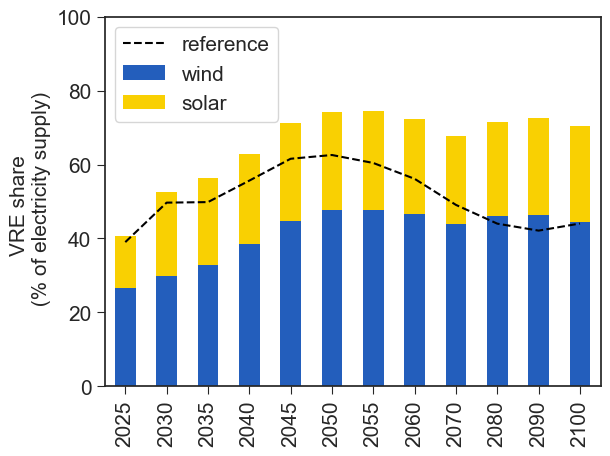

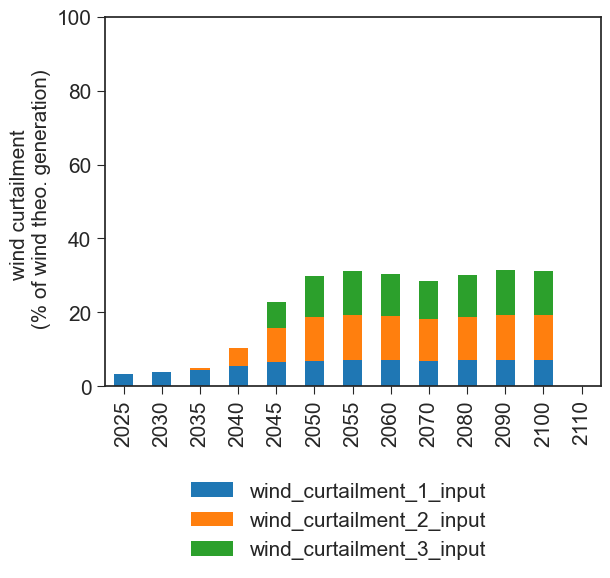

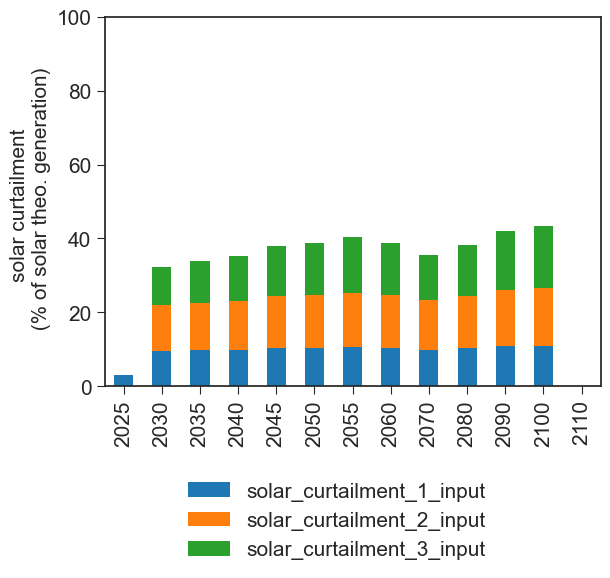

In [91]:
scenarios = {
             "without_integration_cost":scen_zero_integration_cost,
             }
regions = [
         "Europe",
           ["R11_EEU",
            "R11_WEU",
           ],
         ]
results, df_curtailment, df_generation = plot_Behnam_script(scenarios, region_name=regions, path_result="figures_Behnam_script")
fig2, ax2, df_vre_share_pct, act_renewables = plot_gen_share_and_curtailment(scen_zero_integration_cost, df_generation, df_curtailment)
df_vre_share_pct["sum"] = df_vre_share_pct.sum(axis=1)

print(df_vre_share_pct.round(1))
print("")
print("Max VRE share: ",df_vre_share_pct.round(1)["sum"].max())

ax2.plot(np.arange(12),vre_share_reference.values[0:-1], color="black", linestyle="dashed", label="reference")
ax2.legend(prop={'size': fs},frameon=True)
ax2.set_xlim(-0.5,11.5)

fig2.savefig("figures/vre_share_zero_integration_cost.png",dpi=600,bbox_inches='tight')

# Read scenario where all four integration constraints are removed

      wind  solar   sum
2025  29.6   15.0  44.6
2030  30.7   32.1  62.8
2035  22.0   46.0  68.0
2040  21.6   51.2  72.7
2045  21.2   58.6  79.8
2050  22.7   61.6  84.3
2055  23.0   63.2  86.1
2060  23.1   64.1  87.2
2070  19.0   68.8  87.8
2080  12.6   75.8  88.5
2090   9.9   79.1  89.0
2100   9.5   79.6  89.2
2110   NaN    NaN   0.0

Max VRE share:  89.2


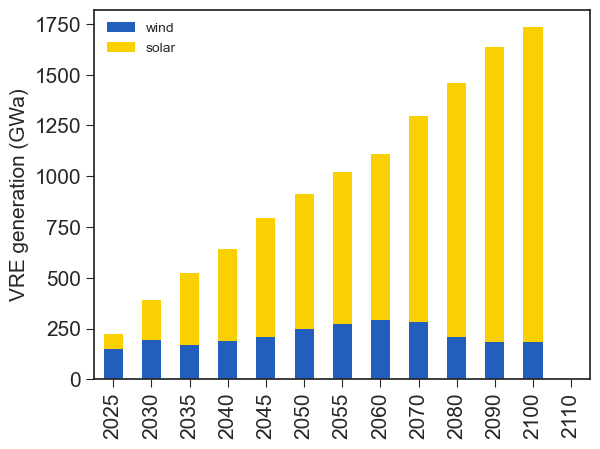

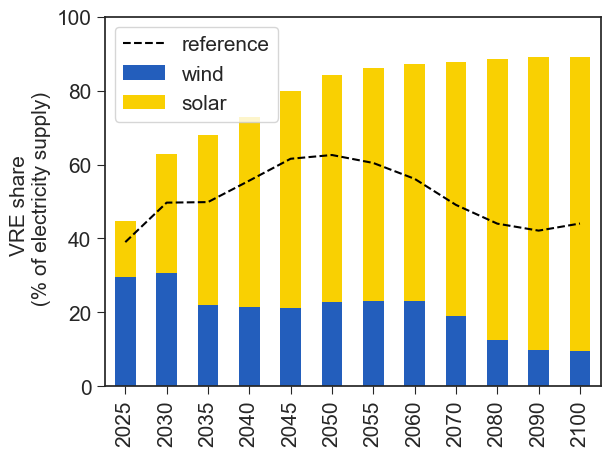

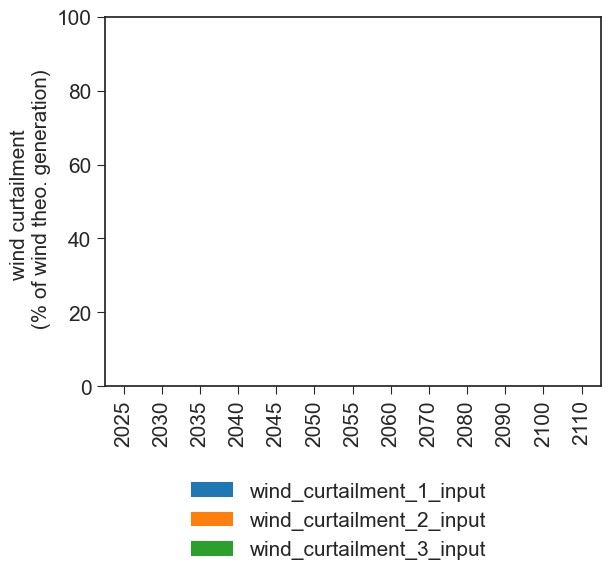

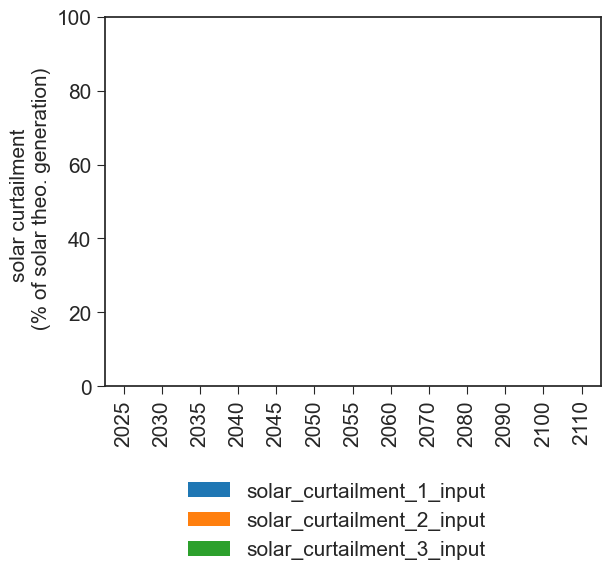

In [97]:
scenarios = {
             "without_any_integration_constraint":scen_all_removed,
             }
regions = [
         "Europe",
           ["R11_EEU",
            "R11_WEU",
           ],
         ]
results, df_curtailment, df_generation = plot_Behnam_script(scenarios, region_name=regions, path_result="figures_Behnam_script")
fig2, ax2, df_vre_share_pct, act_renewables = plot_gen_share_and_curtailment(scen_all_removed, df_generation, df_curtailment)
df_vre_share_pct["sum"] = df_vre_share_pct.sum(axis=1)

print(df_vre_share_pct.round(1))
print("")
print("Max VRE share: ",df_vre_share_pct.round(1)["sum"].max())

ax2.plot(np.arange(12),vre_share_reference.values[0:-1], color="black", linestyle="dashed", label="reference")
ax2.legend(prop={'size': fs},frameon=True)
ax2.set_xlim(-0.5,11.5)

fig2.savefig("figures/vre_share_zero_integration_constraints.png",dpi=600,bbox_inches='tight')

# Read scenario with zero curtailment and integration costs

      wind  solar   sum
2025  26.5   14.3  40.8
2030  29.7   23.3  53.0
2035  26.1   27.3  53.4
2040  27.4   29.8  57.2
2045  30.0   33.9  63.9
2050  31.2   34.7  65.9
2055  31.8   34.0  65.8
2060  30.7   31.9  62.6
2070  28.4   27.6  55.9
2080  22.5   24.6  47.1
2090  16.9   23.8  40.7
2100  16.9   23.0  39.9
2110   NaN    NaN   0.0

Max VRE share:  65.9


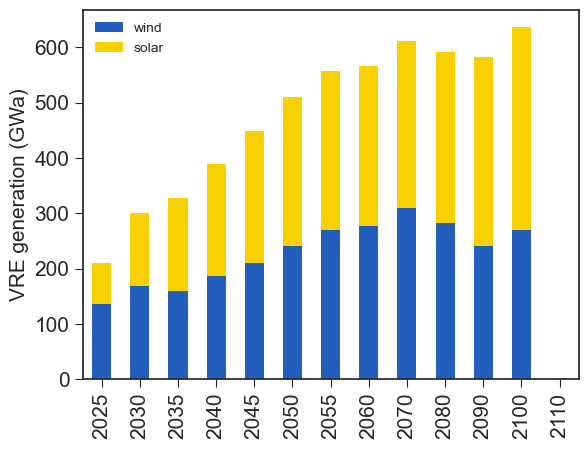

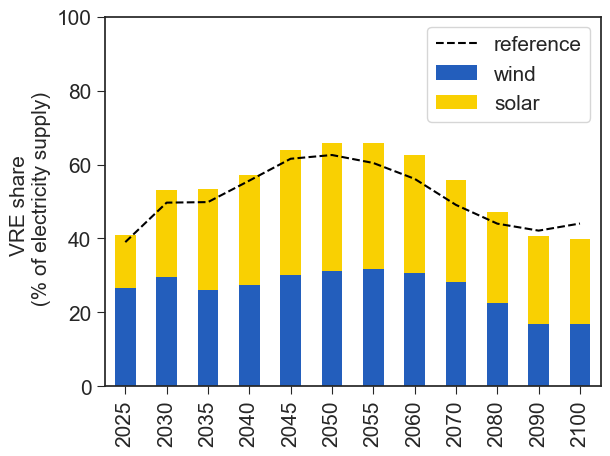

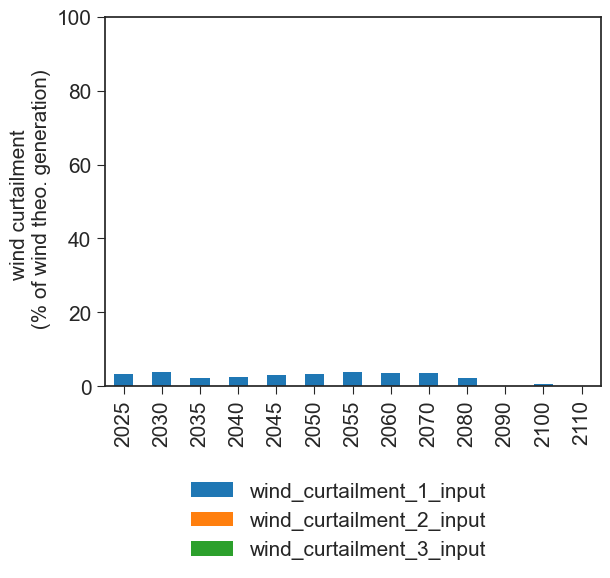

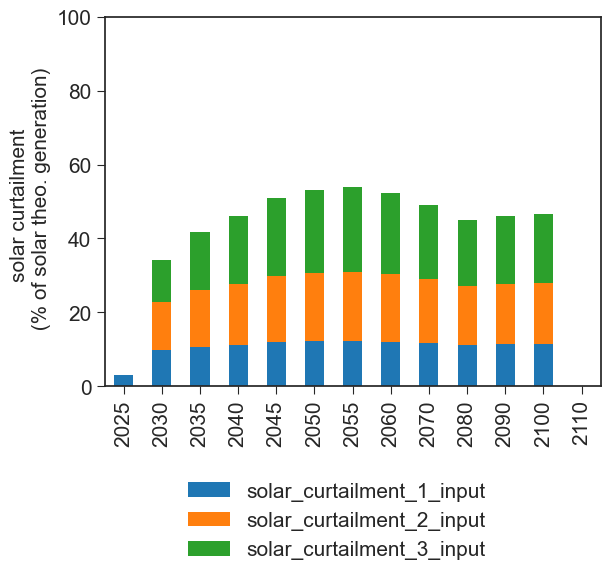

In [123]:
scenarios = {
             "without_ic_and_c":scen_wo_IC_C,
             }
regions = [
         "Europe",
           ["R11_EEU",
            "R11_WEU",
           ],
         ]
results, df_curtailment, df_generation = plot_Behnam_script(scenarios, region_name=regions, path_result="figures_Behnam_script")
fig2, ax2, df_vre_share_pct, act_renewables = plot_gen_share_and_curtailment(scen_wo_IC_C, df_generation, df_curtailment)
df_vre_share_pct["sum"] = df_vre_share_pct.sum(axis=1)

print(df_vre_share_pct.round(1))
print("")
print("Max VRE share: ",df_vre_share_pct.round(1)["sum"].max())

ax2.plot(np.arange(12),vre_share_reference.values[0:-1], color="black", linestyle="dashed", label="reference")
ax2.legend(prop={'size': fs},frameon=True)
ax2.set_xlim(-0.5,11.5)

fig2.savefig("figures/vre_share_wo_ic_and_c.png",dpi=600,bbox_inches='tight')

      wind  solar   sum
2025  27.1   14.5  41.6
2030  27.3   31.3  58.5
2035  22.2   39.0  61.2
2040  22.3   43.8  66.1
2045  22.6   50.9  73.5
2050  22.9   52.9  75.8
2055  23.5   52.3  75.7
2060  23.4   49.0  72.5
2070  23.1   42.4  65.5
2080  19.1   37.1  56.1
2090  14.0   36.7  50.8
2100  14.2   35.9  50.1
2110   NaN    NaN   0.0

Max VRE share:  75.8


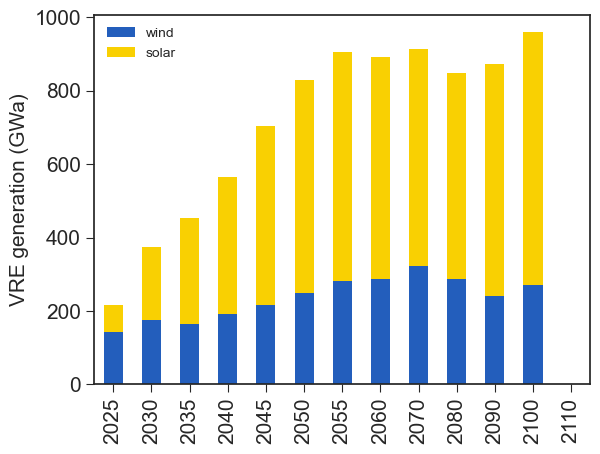

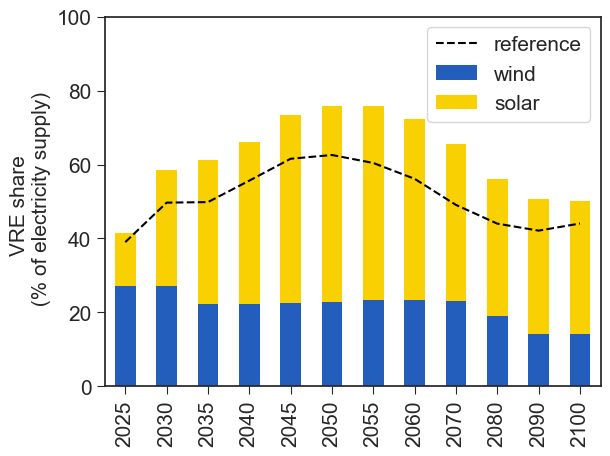

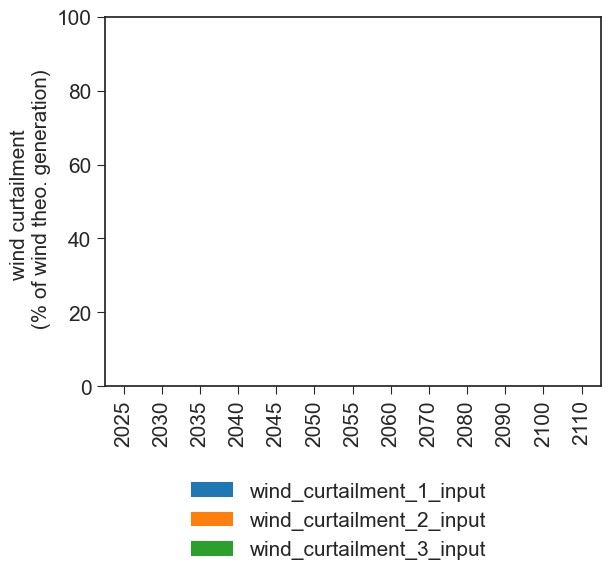

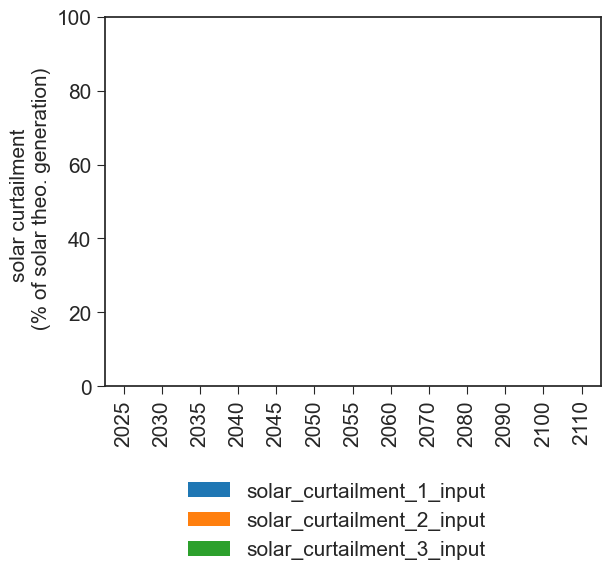

In [102]:
scenarios = {
             "without_ic_and_c":scen_wo_IC_C,
             }
regions = [
         "Europe",
           ["R11_EEU",
            "R11_WEU",
           ],
         ]
results, df_curtailment, df_generation = plot_Behnam_script(scenarios, region_name=regions, path_result="figures_Behnam_script")
fig2, ax2, df_vre_share_pct, act_renewables = plot_gen_share_and_curtailment(scen_wo_IC_C, df_generation, df_curtailment)
df_vre_share_pct["sum"] = df_vre_share_pct.sum(axis=1)

print(df_vre_share_pct.round(1))
print("")
print("Max VRE share: ",df_vre_share_pct.round(1)["sum"].max())

ax2.plot(np.arange(12),vre_share_reference.values[0:-1], color="black", linestyle="dashed", label="reference")
ax2.legend(prop={'size': fs},frameon=True)
ax2.set_xlim(-0.5,11.5)

fig2.savefig("figures/vre_share_wo_ic_and_c.png",dpi=600,bbox_inches='tight')

# Read scenario  with no integration costs and no wind curtailment

      wind  solar   sum
2025  27.2   14.1  41.4
2030  30.1   22.7  52.8
2035  22.7   23.2  45.8
2040  21.4   22.7  44.1
2045  20.0   21.9  41.9
2050  19.3   20.7  39.9
2055  19.3   19.8  39.1
2060  19.8   19.9  39.7
2070  20.4   19.1  39.6
2080  17.3   18.6  35.9
2090  12.0   16.9  28.9
2100  12.1   16.3  28.3
2110   NaN    NaN   0.0

Max VRE share:  52.8


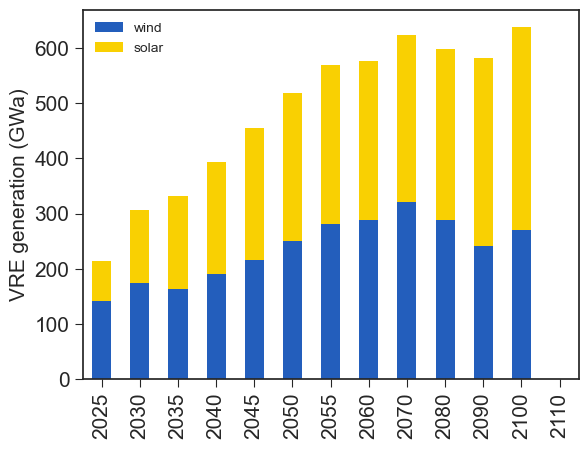

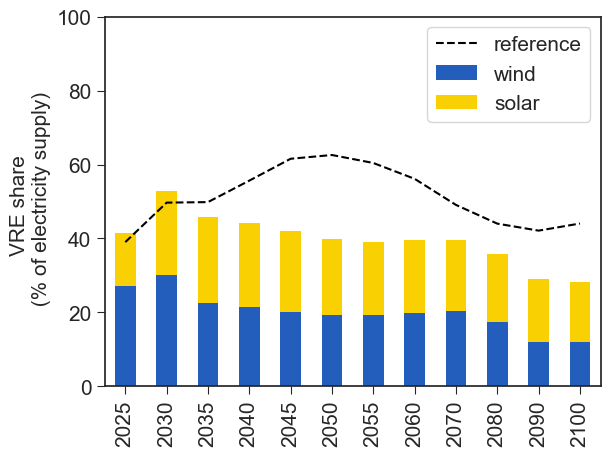

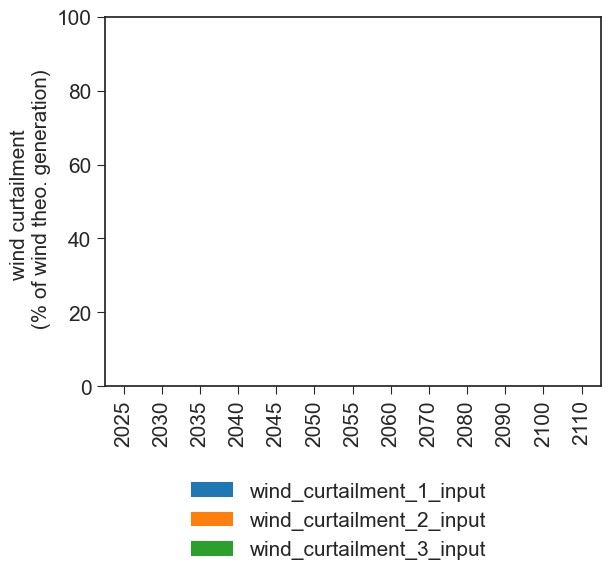

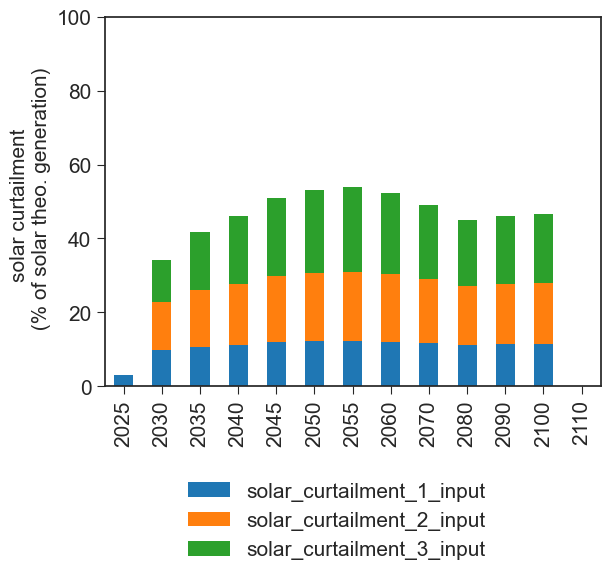

In [110]:
scenarios = {
             "without_ic_and_wc":scen_wo_IC_wC,
             }
regions = [
         "Europe",
           ["R11_EEU",
            "R11_WEU",
           ],
         ]
results, df_curtailment, df_generation = plot_Behnam_script(scenarios, region_name=regions, path_result="figures_Behnam_script")
fig2, ax2, df_vre_share_pct, act_renewables = plot_gen_share_and_curtailment(scen_wo_IC_wC, df_generation, df_curtailment)
df_vre_share_pct["sum"] = df_vre_share_pct.sum(axis=1)

print(df_vre_share_pct.round(1))
print("")
print("Max VRE share: ",df_vre_share_pct.round(1)["sum"].max())

ax2.plot(np.arange(12),vre_share_reference.values[0:-1], color="black", linestyle="dashed", label="reference")
ax2.legend(prop={'size': fs},frameon=True)
ax2.set_xlim(-0.5,11.5)

fig2.savefig("figures/vre_share_wo_ic_and_wc.png",dpi=600,bbox_inches='tight')

      wind  solar   sum
2025  26.4   14.6  41.1
2030  26.5   31.6  58.1
2035  21.8   39.2  61.0
2040  21.8   44.0  65.9
2045  22.1   51.2  73.4
2050  22.3   53.4  75.7
2055  22.8   52.7  75.5
2060  22.8   49.5  72.2
2070  22.4   42.8  65.2
2080  18.7   37.2  55.9
2090  14.0   36.7  50.8
2100  14.1   35.9  50.0
2110   NaN    NaN   0.0

Max VRE share:  75.7


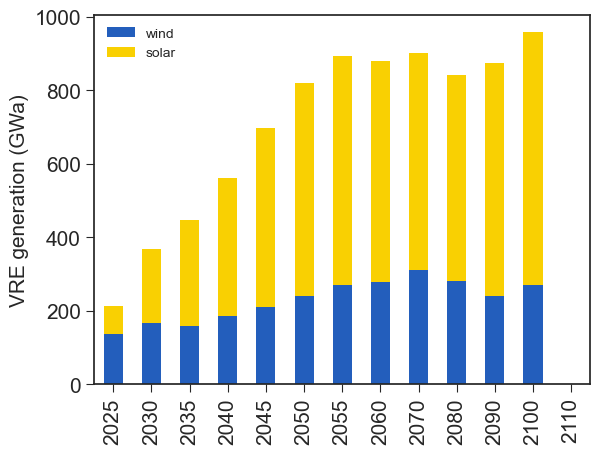

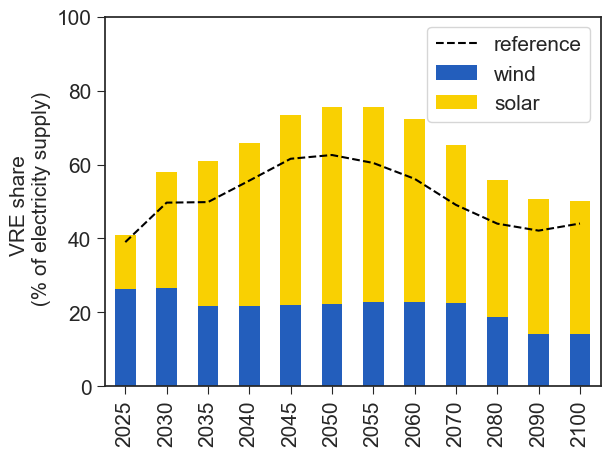

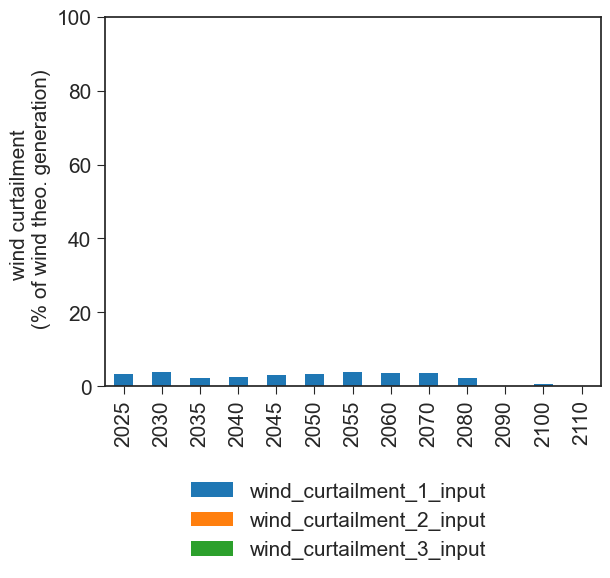

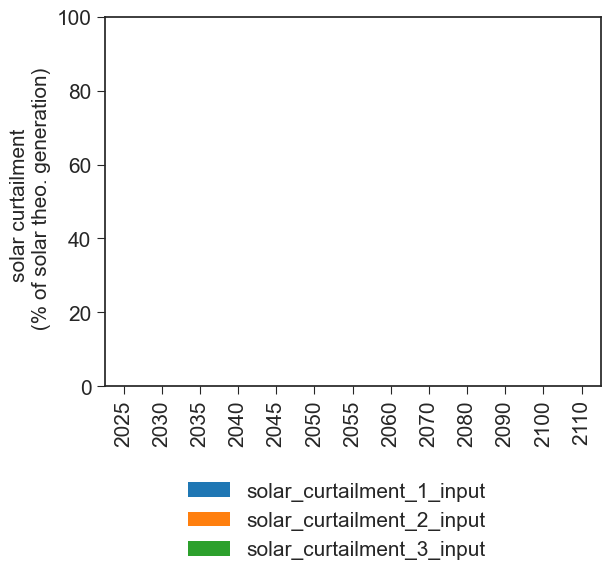

In [115]:
scenarios = {
             "without_ic_and_sc":scen_wo_IC_sC,
             }
regions = [
         "Europe",
           ["R11_EEU",
            "R11_WEU",
           ],
         ]
results, df_curtailment, df_generation = plot_Behnam_script(scenarios, region_name=regions, path_result="figures_Behnam_script")
fig2, ax2, df_vre_share_pct, act_renewables = plot_gen_share_and_curtailment(scen_wo_IC_sC, df_generation, df_curtailment)
df_vre_share_pct["sum"] = df_vre_share_pct.sum(axis=1)

print(df_vre_share_pct.round(1))
print("")
print("Max VRE share: ",df_vre_share_pct.round(1)["sum"].max())

ax2.plot(np.arange(12),vre_share_reference.values[0:-1], color="black", linestyle="dashed", label="reference")
ax2.legend(prop={'size': fs},frameon=True)
ax2.set_xlim(-0.5,11.5)

fig2.savefig("figures/vre_share_wo_ic_and_sc.png",dpi=600,bbox_inches='tight')

# Compare all of them:

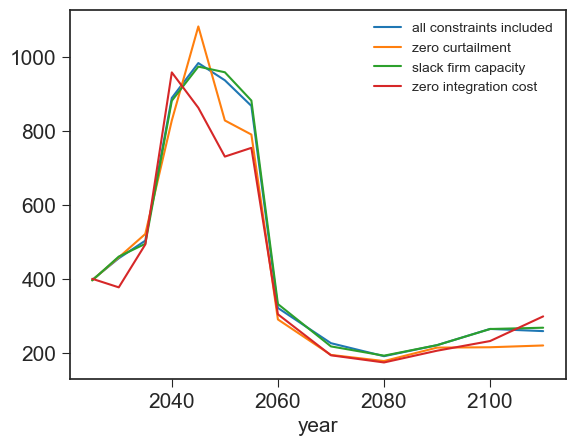

In [92]:
fig, ax = plt.subplots()

co2_price = scen_all_included.var("PRICE_EMISSION")
co2_price.set_index("year",inplace=True)
co2_price = co2_price.lvl/3.67
co2_price.plot(label="all constraints included",ax=ax)

co2_price = scen_zero_curtailment.var("PRICE_EMISSION")
co2_price.set_index("year",inplace=True)
co2_price = co2_price.lvl/3.67
co2_price.plot(label="zero curtailment",ax=ax)

co2_price = scen_slack_firm_capacity.var("PRICE_EMISSION")
co2_price.set_index("year",inplace=True)
co2_price = co2_price.lvl/3.67
co2_price.plot(label="slack firm capacity",ax=ax)

co2_price = scen_zero_integration_cost.var("PRICE_EMISSION")
co2_price.set_index("year",inplace=True)
co2_price = co2_price.lvl/3.67
co2_price.plot(label="zero integration cost", ax=ax)

ax.legend()

In [119]:
mp.close_db()